In [8]:
import numpy as np
import pandas as pd

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy.stats import chisquare

### Create a function that plots the distribution of the digits of a given array compared to the distribution of Benford's law

In [21]:
# distribution according to Benford's law
benford = np.array([30.1, 17.6,12.5,9.7,7.9,6.7,5.8,5.1,4.6])

# the following function returns perc, RMSE, chi where 
# perc is an array of length 9 with at i-th position the percentage of the i-th digit (starting from 1)
# RMSE is the error measuring how far perc is from benford

def Benford(w):
    
    # if a list is given, turn it into an numpy array
    if type(w) is not np.ndarray: w = w.to_numpy()
        
    # extract the first non zero digit
    for j in range(len(w)):
        # if the number is zero, skip
        if w[j]==0: continue
        u = str(w[j])
        # until there are zeros, skip to the next digit
        while (u[0]=='0') or (u[0]=='.'): # skip also '.' in case the number is 0.04274 for example
            u = u[1:]
        
        w[j]=int(u[0])
    
    # now w is an array with integers from 0. to 9.
    
    # count the frequency of each digit as percentage 
    count = pd.Series(w).value_counts(normalize=True).sort_index()
    
    # it might be that a digit is missing. put zero instead.
    perc = pd.DataFrame(count)
    perc.index= [int(x) for x in perc.index]
    zeros = pd.DataFrame({'zero': np.zeros(10)},np.arange(0,10))
    join_df = perc.join(zeros,how='outer').fillna(0)
    
    perc = list((join_df[0]+join_df['zero'])*100)[1:10] # EXCLUDE ZERO!
      
    # calculate root mean squared error
    RMSE = mean_squared_error(benford,perc, squared= False)/(benford.max()-benford.min())
 
    return perc, RMSE

# the next function plots the two percentage vectors. Can put the name of the given vector as input

def Benford_print(w, name= 'Input'):
    perc, RMSE = Benford(w)
    
    fig = plt.figure()
    ax = fig.gca()
    ax.set_xticks(np.arange(1,10))
    plt.scatter(np.arange(1,10), perc, label = 'Naive')
    plt.scatter(np.arange(1,10), benford, color = 'r', label = 'Benford')
    plt.title('Comparing '+name+' and Benford distributions')
    plt.ylabel('Percentage')
    plt.xlabel('Digit')
    ax.legend([name,'Benford'])
    ax.grid(b= True)
    plt.show()
    
    
  #  print('Frequency of the given array: \n', count, '\n')
  #  print('Frequency according to Benford distribution: \n', pd.Series(benford(len(w))), '\n')
    print('RMSE: ', RMSE,'\n\n')

### Let's try it on a random array

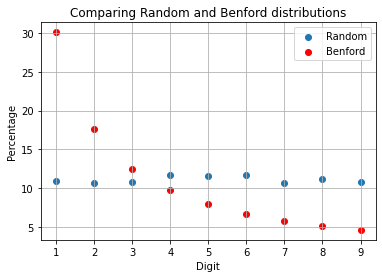

RMSE:  0.3101746081692208 




In [12]:
w = np.random.rand(5674)
Benford_print(w, 'Random')

In [13]:
# let's generate a number of random vectors and see the average RMSE and chi

for k in range(100):
    length = np.random.randint(1,10000)
    perc, RMSE = Benford(np.random.rand(length))
    if k ==0: 
        RMSE_ = RMSE
        perc_ = np.array([perc])
    else:
        RMSE_ = np.append(RMSE_,RMSE)
        perc_ = np.append(perc_,np.array([perc]), axis =0)
    
print('Average RMSE:', RMSE_.mean())
print('Average percentages:', perc_.mean(axis=0))

# should tend to 11.11.. let us increas the numbers

Average RMSE: 0.3060515718656551
Average chisquare: 24.74964449474825
Average percentages: [11.09848241 11.14690387 10.98372112 11.12055557 11.10737258 11.09738598
 11.21878732 11.10289146 11.12389969]


In [7]:
from tqdm import tqdm


for k in tqdm(range(1000)):
    length = np.random.randint(1,100000)
    perc, RMSE = Benford(np.random.rand(length))
    if k ==0: 
        RMSE_ = RMSE
        perc_ = np.array([perc])
    else:
        RMSE_ = np.append(RMSE_,RMSE)
        perc_ = np.append(perc_,np.array([perc]), axis =0)
    
print('Average RMSE:', RMSE_.mean())
print('Average percentages:', perc_.mean(axis=0))

# already better :) no surprises here...

100%|██████████| 1000/1000 [02:37<00:00,  6.34it/s]

Average RMSE: 0.30536165094404444
Average percentages: [11.09318799 11.10392387 11.11416374 11.14434049 11.10612341 11.10619099
 11.0970257  11.13013831 11.10490551]


### The shape of the enford distribution reminds me the exponential one. What's its error?

In [14]:
from scipy.stats import expon
data_expon = expon.rvs(scale=1,loc=0,size=1000)

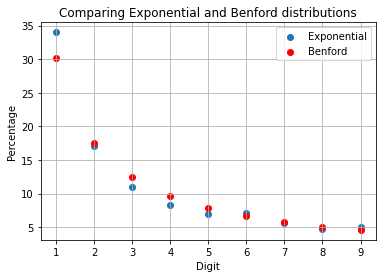

RMSE:  0.059931468686785075 




In [15]:
Benford_print(data_expon, 'Exponential')

In [19]:
# again, let's find an average RMSE

for k in range(1000):
    length = np.random.randint(1,1000)
    perc, RMSE = Benford(expon.rvs(scale=1,loc=0,size=length))
    if k ==0: 
        RMSE_ex = RMSE
        perc_ex = np.array([perc])
    else:
        RMSE_ex = np.append(RMSE_ex,RMSE)
        perc_ex = np.append(perc_ex,np.array([perc]), axis =0)
    
print('Average RMSE:', RMSE_ex.mean())
print('Average percentages:', perc_ex.mean(axis=0))

Average RMSE: 0.08226569726159617
Average percentages: [32.96584629 17.41979919 11.31320991  8.56442581  7.17090143  6.36969767
  5.87815393  5.32258046  4.99538533]


### Now it's time to take some real dataset and see whether Benford's law holds

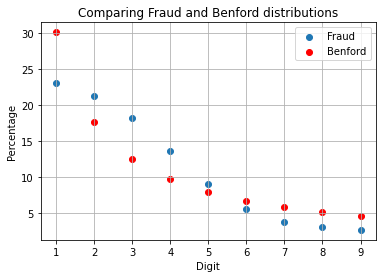

RMSE:  0.14664955548014777 




In [22]:
# we take the Fraud Detection on Bank Payments dataset from 
# https://www.kaggle.com/turkayavci/fraud-detection-on-bank-payments/data

df = pd.read_csv('fraud_detection_bank_dataset.csv')

# and consider the column with the amount of the purchase 
amount = df['amount']
Benford_print(amount, 'Fraud')

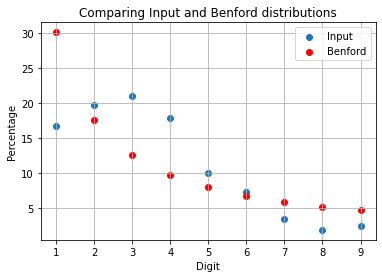

RMSE:  0.2441275146594341 




In [23]:
# Consider the MusicNet dataset, a collection of 330 freely-licensed classical music recordings
# https://www.kaggle.com/imsparsh/musicnet-dataset?select=musicnet_metadata.csv

df_1 = pd.read_csv('musicnet_metadata.csv')

# and consider the column with the duration of the recording, in seconds
sec = df_1['seconds']
Benford_print(sec)

# NOPE... it looks more like a gaussian

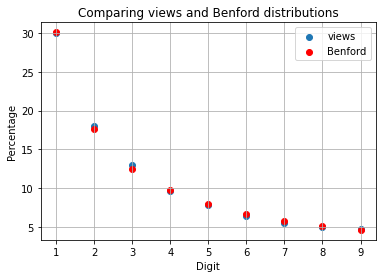

RMSE:  0.00928091004746307 




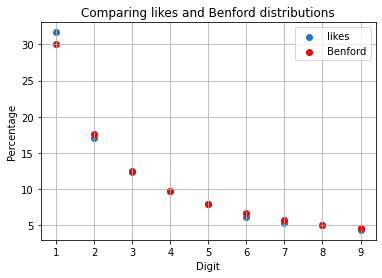

RMSE:  0.023828268477435136 




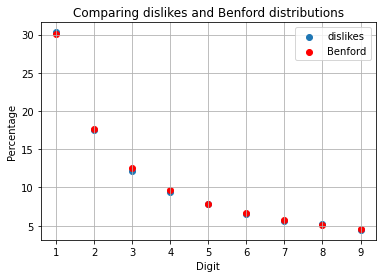

RMSE:  0.0078072070125858066 




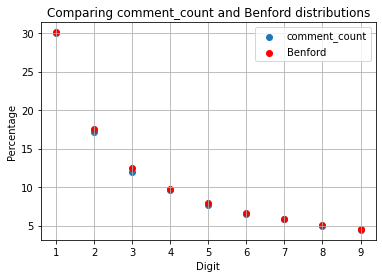

RMSE:  0.010653841084520414 




In [69]:
# Trending YouTube Video Statistics
# https://www.kaggle.com/datasnaek/youtube-new?select=USvideos.csv

dfYT = pd.read_csv('USvideos.csv')

attr = ['views', 'likes', 
        'dislikes', 'comment_count']

dfYT_copy= dfYT.copy()
for col in attr:
    Benford_print(dfYT_copy[col],col)
    
# WOW!! I don't need to explain the results... it fits perfectly :) 
# we could try to study the outliars and see what they have in common